In [1]:
import pandas as pd

In [2]:
persontrip = pd.read_csv('person trip(station, elementary school, and junior high school).csv')
persontrip.head()

,S05a_001,S05a_002,S05a_003,S05a_004,S05a_005,S05a_006,S05a_007,S05a_008,S05a_009,train,...,S05a_029,S05a_030,S05a_031,S05a_032,S05a_033,foot,S05a_035,station,elementary,juniorhigh
0,1,2008,1,123,36732,6360,16336,6341,26432,92201,...,6021,6853,36319,2419,37561,89173,256026,42,0,0
1,1,2008,1,124,3568,892,2180,902,6426,13968,...,477,651,2526,188,2670,6512,33954,0,0,0
2,1,2008,1,130,22260,3694,8259,2609,9703,46525,...,3007,3130,16209,932,15997,39275,131513,4,5,3
3,1,2008,1,131,29093,5153,12648,7234,25663,79791,...,5257,8285,31119,1454,32615,78730,273717,10,10,4
4,1,2008,1,132,7314,1543,5807,4054,21689,40407,...,1685,2248,8083,458,8496,20970,133225,8,6,3


In [3]:
columns = ['foot','train','bus','bike','station','elementary']
persontrip = persontrip[columns]
persontrip.head()

,foot,train,bus,bike,station,elementary
0,89173,92201,2892,53221,42,0
1,6512,13968,1645,4768,0,0
2,39275,46525,7262,23923,4,5
3,78730,79791,13249,74395,10,10
4,20970,40407,3543,35177,8,6


In [4]:
from pandas.plotting import scatter_matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021A954B0CF8>,
      dtype=object)

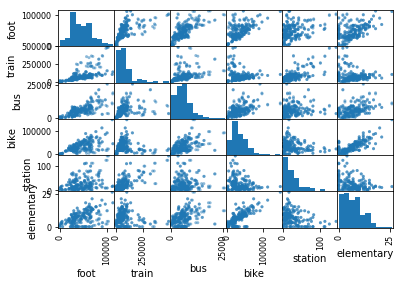

In [6]:
scatter_matrix(persontrip)

In [7]:
persontrip.corr().round(3)

,foot,train,bus,bike,station,elementary
foot,1.000,0.616,0.711,0.597,0.341,0.485
train,0.616,1.000,0.321,-0.094,0.713,-0.148
bus,0.711,0.321,1.000,0.490,0.098,0.422
bike,0.597,-0.094,0.490,1.000,-0.226,0.760
station,0.341,0.713,0.098,-0.226,1.000,-0.329
elementary,0.485,-0.148,0.422,0.760,-0.329,1.000


In [8]:
from scipy.stats import pearsonr, linregress

In [9]:
pearsonr(persontrip['foot'],persontrip['train'])

(0.6160371805478145, 1.1747822961163134e-35)

In [10]:
pearsonr(persontrip['foot'],persontrip['bus'])

(0.7106600684306732, 1.0169489986038211e-51)

In [11]:
pearsonr(persontrip['foot'],persontrip['bike'])

(0.5969508215986082, 4.7487778893754455e-33)

In [12]:
pearsonr(persontrip['foot'],persontrip['station'])

(0.3413313026072411, 2.154786464705523e-10)

In [13]:
pearsonr(persontrip['foot'],persontrip['elementary'])

(0.48539990067782374, 8.605267724639115e-21)

In [14]:
from sklearn import linear_model

In [15]:
clf = linear_model.LinearRegression()

variable = persontrip.drop('foot',axis=1)
x = variable.as_matrix()

y = persontrip['foot'].as_matrix()

clf.fit(x, y)

print(pd.DataFrame({"Name":variable.columns,
                    "Coefficients":clf.coef_}).sort_values(by='Coefficients') )

print(clf.intercept_)

   Coefficients        Name
0      0.152994       train
2      0.407600        bike
1      1.420090         bus
3     69.108655     station
4    790.626213  elementary
3057.31823248024


In [16]:
import numpy as np

In [17]:
persontrip2 = persontrip.apply(lambda x: (x - np.mean(x)) / (np.max(x) - np.min(x)))
persontrip2.head()

,foot,train,bus,bike,station,elementary
0,0.383667,0.013533,-0.125612,0.127212,0.102027,-0.267589
1,-0.357036,-0.148470,-0.173897,-0.202679,-0.193748,-0.267589
2,-0.063455,-0.081052,0.043597,-0.072263,-0.165579,-0.075281
3,0.290090,-0.012165,0.275418,0.271374,-0.123325,0.117026
4,-0.227482,-0.093721,-0.100405,0.004360,-0.137410,-0.036820


In [18]:
clf = linear_model.LinearRegression()

variable2 = persontrip2.drop("foot", axis=1)
x = variable2.as_matrix()
 
y = persontrip2['foot'].as_matrix()
 
clf.fit(x, y)
  
print(pd.DataFrame({"Name":variable2.columns,
                    "Coefficients":np.abs(clf.coef_)}).sort_values(by='Coefficients') )
 
print(clf.intercept_)

   Coefficients        Name
3      0.087936     station
4      0.184199  elementary
1      0.328637         bus
2      0.536449        bike
0      0.662040       train
3.3162305656818055e-17
